In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

In [20]:
X_train=np.loadtxt(r"D:\Placement\GitHub\Deep Learning Projects\Dog or Cat-Keras\source file\input.csv",delimiter=',')

In [21]:
y_train=np.loadtxt(r"D:\Placement\GitHub\Deep Learning Projects\Dog or Cat-Keras\source file\labels.csv",delimiter=',')

In [26]:
X_test=np.loadtxt(r"D:\Placement\GitHub\Deep Learning Projects\Dog or Cat-Keras\source file\input_test.csv",delimiter=',')

In [27]:
y_test=np.loadtxt(r"D:\Placement\GitHub\Deep Learning Projects\Dog or Cat-Keras\source file\labels_test.csv",delimiter=',')

In [28]:
X_train.shape

(2000, 30000)

In [29]:
X_test.shape

(400, 30000)

In [30]:
X_train=X_train.reshape(len(X_train),100,100,3)
X_test=X_test.reshape(len(X_test),100,100,3)
y_train=y_train.reshape(len(y_train),1)
y_test=y_test.reshape(len(y_test),1)

In [31]:
X_train=X_train/255

In [32]:
X_test=X_test/255

In [33]:
print("Shape of X_train = ",X_train.shape)
print("Shape of X_test = ",X_test.shape)
print("Shape of y_train = ",y_train.shape)
print("Shape of y_test = ",y_test.shape)

Shape of X_train =  (2000, 100, 100, 3)
Shape of X_test =  (400, 100, 100, 3)
Shape of y_train =  (2000, 1)
Shape of y_test =  (400, 1)


# Model-

In [34]:
model=Sequential()

In [39]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

In [40]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [41]:
model.add(Flatten())

In [42]:
model.add(Dense(64,activation='relu'))

In [43]:
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
model.fit(X_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 31s 887ms/step - loss: 0.6974 - accuracy: 0.5115
Epoch 2/5
32/32 [==============================] - 29s 920ms/step - loss: 0.6928 - accuracy: 0.5225
Epoch 3/5
32/32 [==============================] - 29s 896ms/step - loss: 0.6874 - accuracy: 0.5575
Epoch 4/5
32/32 [==============================] - 28s 872ms/step - loss: 0.6654 - accuracy: 0.6130
Epoch 5/5
32/32 [==============================] - 31s 968ms/step - loss: 0.6095 - accuracy: 0.6725


In [48]:
model.fit(X_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 32s 987ms/step - loss: 0.5441 - accuracy: 0.7185
Epoch 2/5
32/32 [==============================] - 32s 993ms/step - loss: 0.4743 - accuracy: 0.7760
Epoch 3/5
32/32 [==============================] - 31s 971ms/step - loss: 0.3975 - accuracy: 0.8060
Epoch 4/5
32/32 [==============================] - 32s 1s/step - loss: 0.3664 - accuracy: 0.8290
Epoch 5/5
32/32 [==============================] - 31s 977ms/step - loss: 0.2757 - accuracy: 0.8815


In [49]:
model.fit(X_train,y_train,epochs=2,batch_size=64)

Epoch 1/2
32/32 [==============================] - 31s 985ms/step - loss: 0.1858 - accuracy: 0.9290
Epoch 2/2
32/32 [==============================] - 31s 961ms/step - loss: 0.1318 - accuracy: 0.9475


In [50]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 1s 49ms/step - loss: 1.0838 - accuracy: 0.6825


[1.083816409111023, 0.6825000047683716]

# Making Predictions-

In [71]:
idx=random.randint(0,len(y_test))

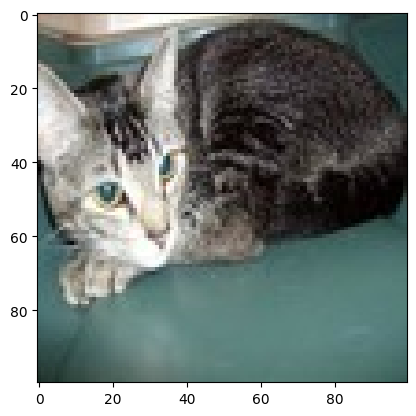

In [72]:
plt.imshow(X_test[idx,:])
plt.show()

In [73]:
y_pred=model.predict(X_test[idx,:].reshape(1,100,100,3))

1/1 [==============================] - 0s 20ms/step


In [74]:
y_pred

array([[0.9669825]], dtype=float32)

In [75]:
y_pred=y_pred>0.5

In [76]:
if y_pred==0:
    pred="Dog"
else:
    pred="Cat"

In [77]:
print(pred)

Cat
